<a href="https://colab.research.google.com/github/osolenye/machine_learning/blob/master/vectorization_english.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
Index(['Term', 'Meaning', 'Source', 'Topic'], dtype='object')
Топ-10 униграмм: [('bit', 12), ('cache', 12), ('firewall', 12), ('encryption', 11), ('authentication', 10), ('cloud computing', 10), ('bandwidth', 9), ('byte', 9), ('domain', 9), ('ethernet', 9)]
Топ-10 биграмм: [('bit--bit', 11), ('cache--cache', 11), ('firewall--firewall', 11), ('encryption--encryption', 10), ('authentication--authentication', 9), ('cloud computing--cloud computing', 9), ('bandwidth--bandwidth', 8), ('byte--byte', 8), ('domain--domain', 8), ('ethernet--ethernet', 8)]
Топ-10 триграмм: [('bit--bit--bit', 10), ('cache--cache--cache', 10), ('firewall--firewall--firewall', 10), ('encryption--encryption--encryption', 9), ('authentication--authentication--authentication', 8), ('cloud computing--cloud computing--cloud computing', 8), ('bandwidth--bandwidth--bandwidth', 7), ('byte--byte--byte', 7), ('domain--domain--domain', 7), ('ethernet--ethernet--ethernet', 7)]


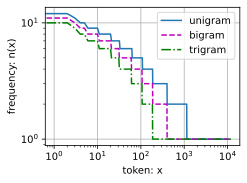

In [1]:
!pip install d2l==1.0.3
import pandas as pd
import collections
import re
import matplotlib.pyplot as plt
from d2l import torch as d2l
from google.colab import drive

# Подключаем Google Диск
drive.mount('/content/drive')

# Путь к новому файлу (замени на правильный путь)
file_path = "/content/drive/My Drive/ML_labs/data/terms AIN-2-22 english final.xlsx"

# Загружаем Excel-файл
df = pd.read_excel(file_path)

# Проверяем колонки
print(df.columns)

# Берем колонку с терминами
terms = df['Term'].dropna().astype(str).tolist()

# Предобработка: оставляем только буквы и пробелы
terms = [re.sub(r'[^\w\s]', '', term).lower() for term in terms]

# Строим словарь частотности
class Vocab:
    def __init__(self, tokens, min_freq=0):
        counter = collections.Counter(tokens)
        self.token_freqs = sorted(counter.items(), key=lambda x: x[1], reverse=True)
        self.idx_to_token = [token for token, freq in self.token_freqs if freq >= min_freq]
        self.token_to_idx = {token: idx for idx, token in enumerate(self.idx_to_token)}

    def __getitem__(self, tokens):
        if isinstance(tokens, list):
            return [self.token_to_idx.get(token, -1) for token in tokens]
        return self.token_to_idx.get(tokens, -1)

    def to_tokens(self, indices):
        if isinstance(indices, list):
            return [self.idx_to_token[i] for i in indices if i >= 0]
        return self.idx_to_token[indices] if indices >= 0 else None

    def __len__(self):
        return len(self.idx_to_token)

# Униграммы
vocab = Vocab(terms)
print("Топ-10 униграмм:", vocab.token_freqs[:10])

# Биграммы
bigram_tokens = ['--'.join(pair) for pair in zip(terms[:-1], terms[1:])]
bigram_vocab = Vocab(bigram_tokens)
print("Топ-10 биграмм:", bigram_vocab.token_freqs[:10])

# Триграммы
trigram_tokens = ['--'.join(triple) for triple in zip(terms[:-2], terms[1:-1], terms[2:])]
trigram_vocab = Vocab(trigram_tokens)
print("Топ-10 триграмм:", trigram_vocab.token_freqs[:10])

# Строим графики
freqs = [freq for _, freq in vocab.token_freqs]
bigram_freqs = [freq for _, freq in bigram_vocab.token_freqs]
trigram_freqs = [freq for _, freq in trigram_vocab.token_freqs]

d2l.plot([freqs, bigram_freqs, trigram_freqs], xlabel='token: x', ylabel='frequency: n(x)',
         xscale='log', yscale='log', legend=['unigram', 'bigram', 'trigram'])
plt.show()
